# Data Preprocessing

In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [42]:
dataset_path = "..\Original Dataset"

categories = ["Black Spot", "Downy Mildew", "Fresh Leaf"]

IMG_SIZE = (256, 256)

X = [] 
y = []
image_sizes = [] 


In [43]:
def preprocess_image(img_path, target_size=(256, 256)):
    """Load an image, resize it, and normalize pixel values."""
    img = Image.open(img_path).convert("RGB")
    original_size = img.size
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0
    return img_array, original_size


In [44]:
for category in categories:
    category_path = os.path.join(dataset_path, category)
    class_index = categories.index(category)

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)

        img_array, original_size = preprocess_image(img_path, IMG_SIZE)

        X.append(img_array)
        y.append(class_index)
        image_sizes.append(original_size)


In [45]:
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int32)  

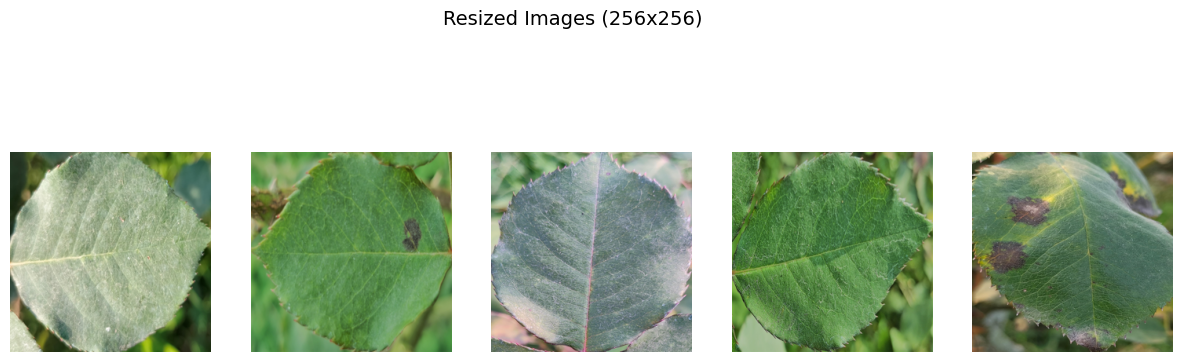

In [46]:

# demonstration of resized images from the dataset
num_samples = 5
indices = np.random.choice(len(X), num_samples, replace=False)

fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

for i, idx in enumerate(indices):
    img = X[idx]  
    axes[i].imshow(img)
    axes[i].axis("off")

plt.suptitle("Resized Images (256x256)", fontsize=14)
plt.show()


# Histogram Visualization of Image Sizes

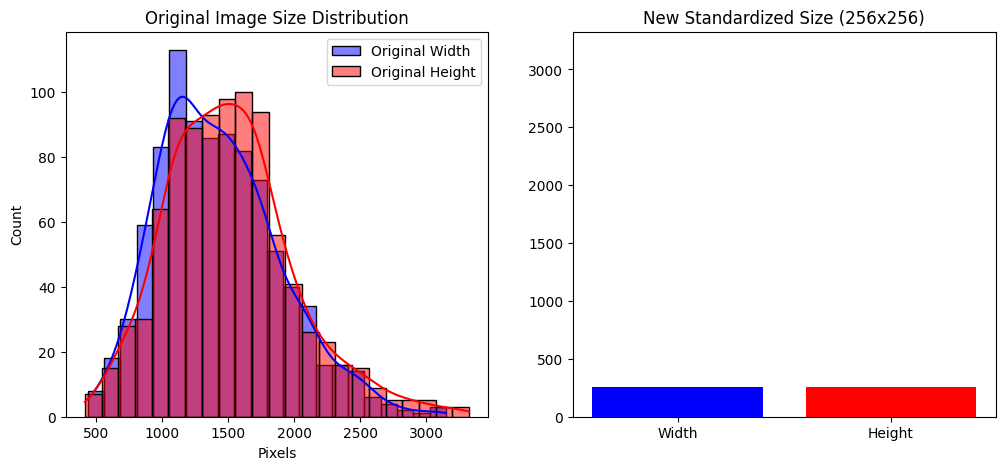

In [47]:
orig_widths, orig_heights = zip(*image_sizes)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(orig_widths, color="blue", label="Original Width", kde=True)
sns.histplot(orig_heights, color="red", label="Original Height", kde=True)
plt.xlabel("Pixels")
plt.ylabel("Count")
plt.title("Original Image Size Distribution")
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(["Width", "Height"], [IMG_SIZE[0], IMG_SIZE[1]], color=["blue", "red"])
plt.ylim(0, max(orig_widths + orig_heights))
plt.title("New Standardized Size (256x256)")

plt.show()